In [37]:
from mmdet.apis import init_detector, inference_detector_parsing, show_result_pyplot
import mmcv
import numpy as np
import cv2
import os
from PIL import Image

In [38]:
from visual import *

In [39]:
home_root = "/root/multi-parsing/"
data_root = "/root/data/LV-MHP-v2/"
#data_root = "/root/data/CHIP/"
#data_root = "/root/autodl-tmp/Densepose_CoCo/images/"

## SMP1.0 

In [42]:
config_file = home_root + 'configs/smp/MHP_r50_fpn_2gpu_1x_offset_parsing_v1_ori_grid_unified_DCN.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '/root/autodl-nas/SMP_1x_baseline.pth'

In [4]:
config_file = home_root + 'configs/smp/MHP_r101_fpn_8gpu_1x_offset_parsing_v1_ori_grid_unified_DCN.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = home_root + 'work_dirs/MHP_release_r101_fpn_8gpu_1x_offset_parsing_v1/ori_gird_DCN_1x/epoch_12.pth'

In [6]:
config_file = home_root + 'configs/smp/MHP_r101_fpn_8gpu_3x_offset_parsing_v1_ori_grid_unified_DCN.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = home_root + 'work_dirs/MHP_release_r101_fpn_8gpu_3x_offset_parsing_v1/DCN/epoch_36.pth'

In [33]:
config_file = home_root + 'configs/smp/MHP_r101_fpn_8gpu_1x_offset_parsing_v1_ori_grid_unified_DCN_large.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = home_root + 'work_dirs/MHP_release_r101_fpn_8gpu_1x_offset_parsing_v1/ori_gird_DCN_1x__large/epoch_12.pth'

## Model init

In [113]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /root/autodl-nas/Uniparser_3x_baseline_r101.pth


2023-05-23 17:36:20,878 - root - INFO - ModulatedDeformConvPack backbone.layer2.0.conv2 is upgraded to version 2.
2023-05-23 17:36:20,881 - root - INFO - ModulatedDeformConvPack backbone.layer2.1.conv2 is upgraded to version 2.
2023-05-23 17:36:20,883 - root - INFO - ModulatedDeformConvPack backbone.layer2.2.conv2 is upgraded to version 2.
2023-05-23 17:36:20,885 - root - INFO - ModulatedDeformConvPack backbone.layer2.3.conv2 is upgraded to version 2.
2023-05-23 17:36:20,888 - root - INFO - ModulatedDeformConvPack backbone.layer3.0.conv2 is upgraded to version 2.
2023-05-23 17:36:20,891 - root - INFO - ModulatedDeformConvPack backbone.layer3.1.conv2 is upgraded to version 2.
2023-05-23 17:36:20,893 - root - INFO - ModulatedDeformConvPack backbone.layer3.2.conv2 is upgraded to version 2.
2023-05-23 17:36:20,895 - root - INFO - ModulatedDeformConvPack backbone.layer3.3.conv2 is upgraded to version 2.
2023-05-23 17:36:20,898 - root - INFO - ModulatedDeformConvPack backbone.layer3.4.conv2 

In [293]:
# test a single image
img = data_root + 'val/images/11790.jpg'
gt_name = "0000337-1.png"

result = inference_detector_parsing(model, img)

seg_masks = result[0]
if type(seg_masks) == list:
    seg_masks = np.array(seg_masks)
offset_vis = result[1]
score_list = result[2]

img_ori = mmcv.imread(img)

h,w,_ = img_ori.shape

random flip for mhp dataset
save smantic masks:  0.009138107299804688
0.13193345069885254


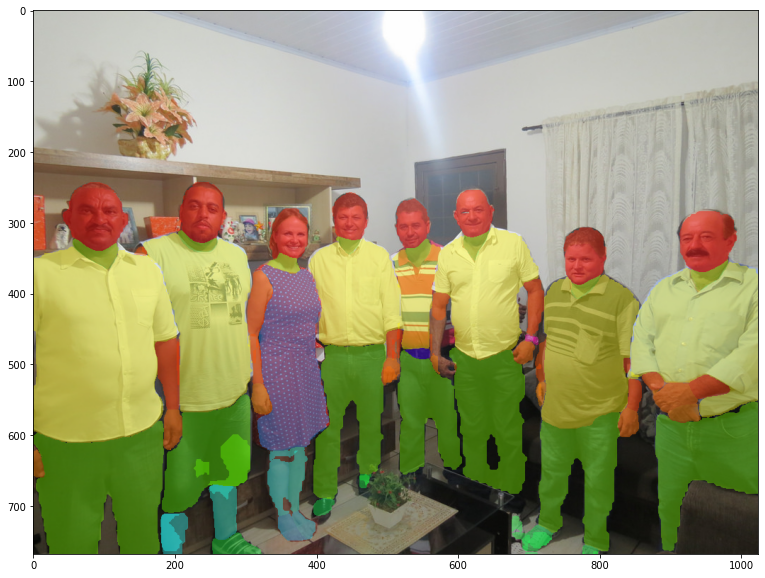

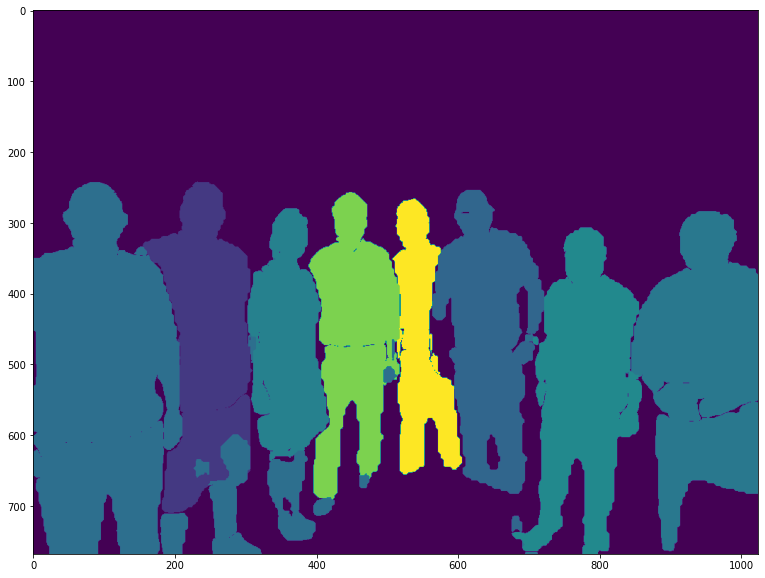

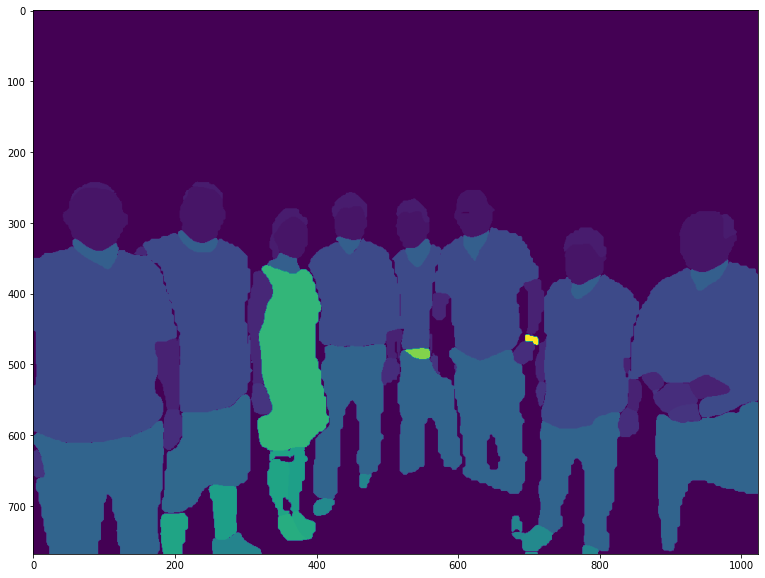

In [294]:
cobmine_img_and_seg(seg_masks, img, data_root)
seg_visual_human_in_one(seg_masks, img)
seg_visual_in_one(seg_masks, img)

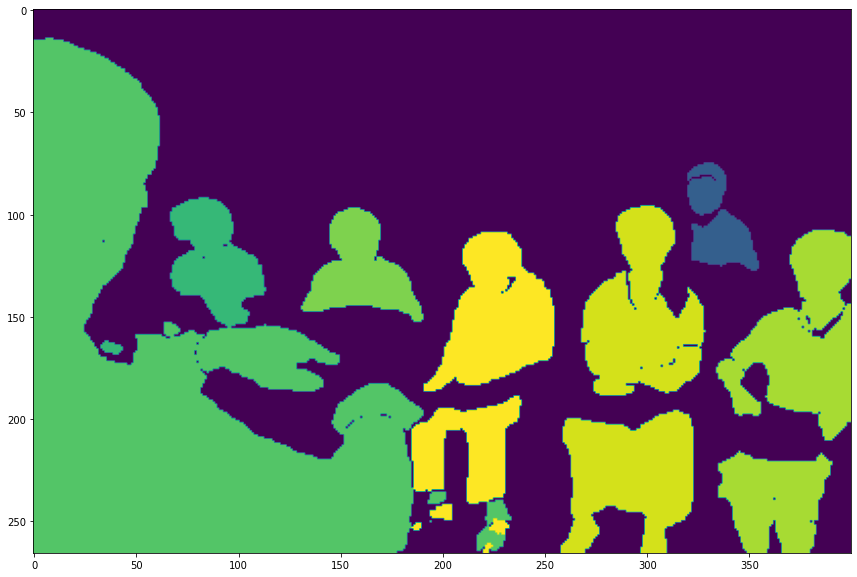

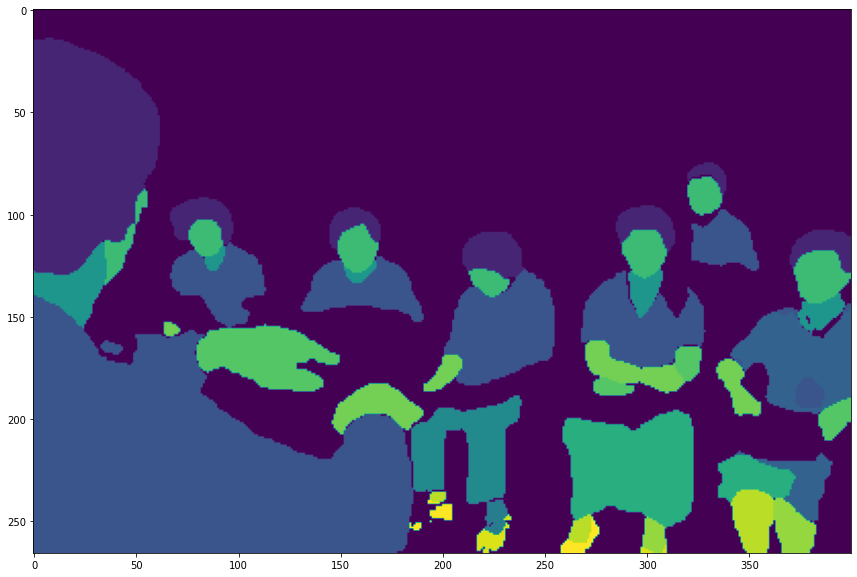

In [91]:
seg_visual_human_in_one(seg_masks, img)
seg_visual_in_one(seg_masks, img)
#seg_visual(seg_masks,img)

# Offset

In [ ]:
# ! rm -rf /home/notebook/code/personal/S9043252/multi-parsing/visual/offset/offset_map/test/
# offset_visual(offset_vis, img_ori, img,S=40)

# Parsing

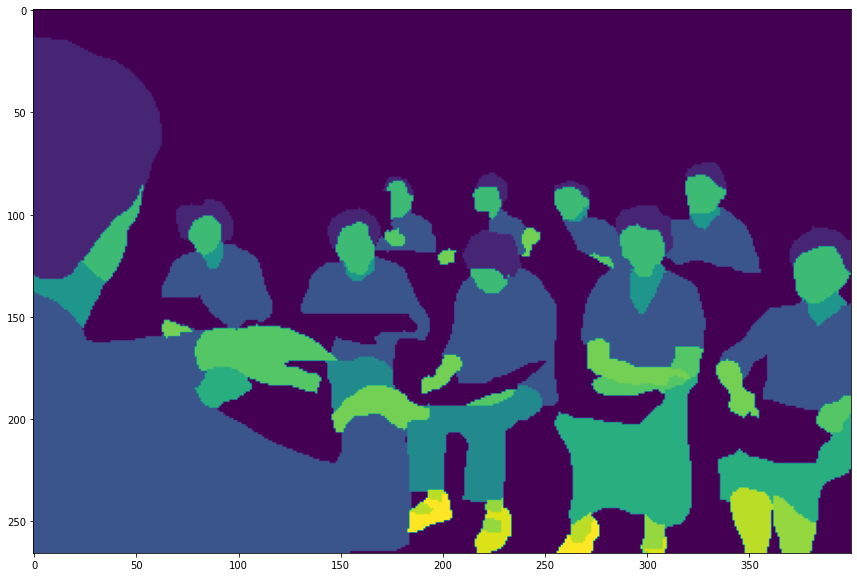

In [89]:
def gt_visual_in_one(gtname_list, data_root):
    add = data_root + "val_seg/"
    gt = np.array(Image.open(add+gtname_list[0]))
    if len(gt.shape)==3: gt = gt[:,:,0]
    parsing = np.zeros_like(gt)
    for i in range(len(gtname_list)):
        gtname = gtname_list[i]
        gt = np.array(Image.open(add+gtname))
        if len(gt.shape)==3: gt = gt[:,:,0]
        gt_ind = gt>0
        parsing[gt_ind] = gt[gt_ind]
    plt.figure(figsize=(16,10))
    plt.imshow(parsing)
    
gt_visual_in_one(['0038394.png'], data_root)